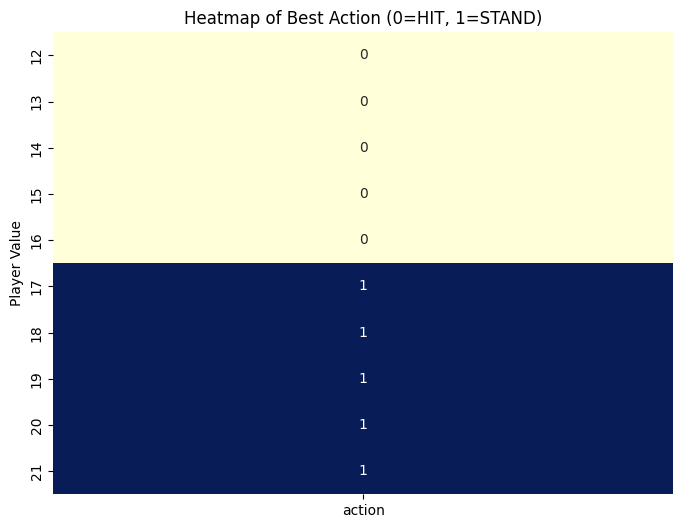

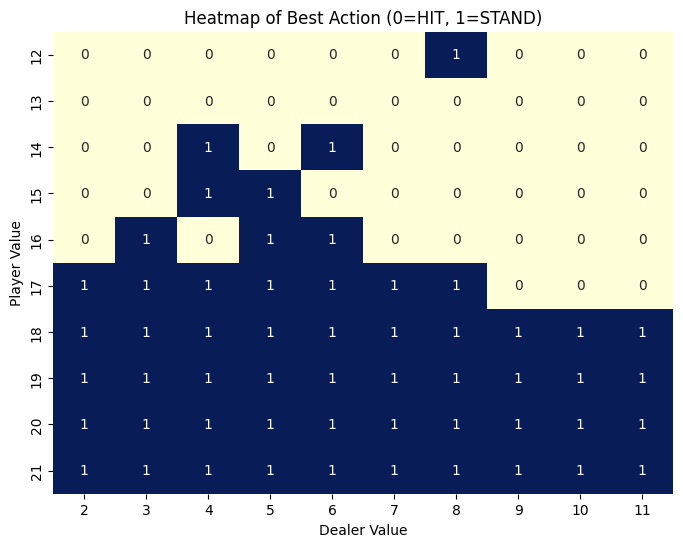

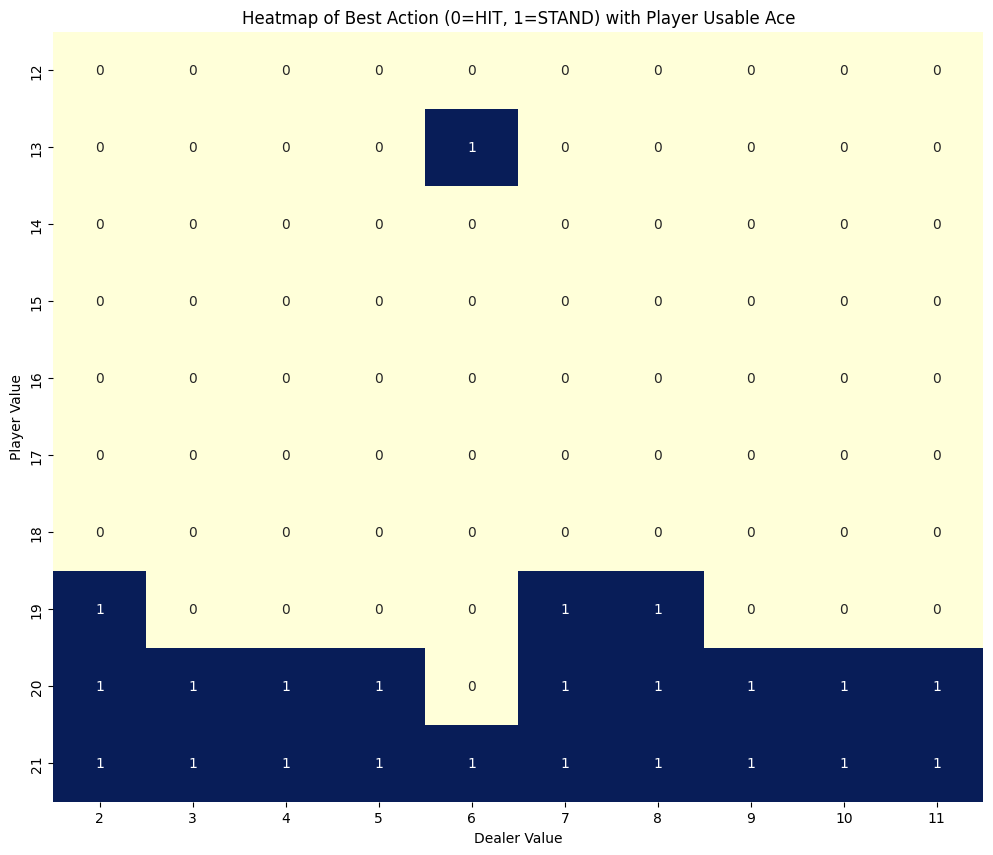

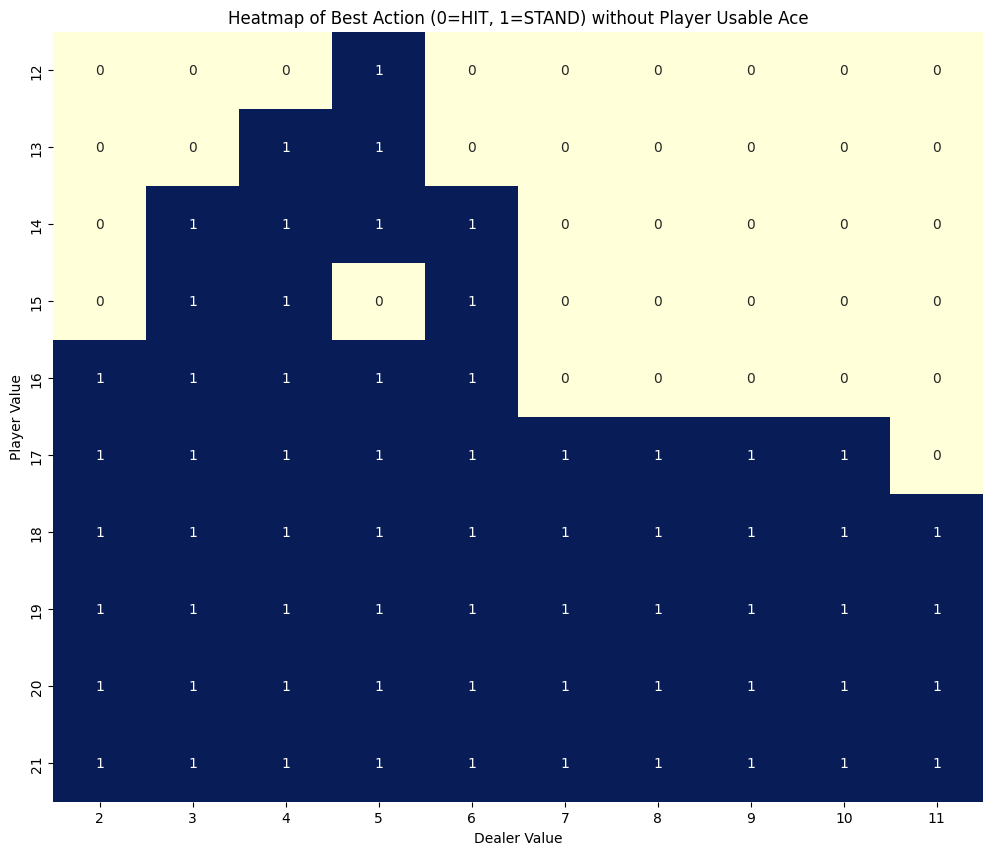

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_qtable(file_path, table_type):
    df = pd.read_csv(file_path)
    
    if table_type == 'player':
        df['action'] = df['Q(STAND)'] > df['Q(HIT)']
        df['action'] = df['action'].astype(int)
        pivot = df.pivot_table(index='PlayerValue', values='action')
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot, annot=True, cmap="YlGnBu", cbar=False)
        plt.title('Heatmap of Best Action (0=HIT, 1=STAND)')
        plt.xlabel('')
        plt.ylabel('Player Value')
        plt.show()
    
    elif table_type == 'player_dealer':
        df['action'] = df['Q(STAND)'] > df['Q(HIT)']
        df['action'] = df['action'].astype(int)
        pivot = df.pivot_table(index='PlayerValue', columns='DealerValue', values='action')
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot, annot=True, cmap="YlGnBu", cbar=False)
        plt.title('Heatmap of Best Action (0=HIT, 1=STAND)')
        plt.xlabel('Dealer Value')
        plt.ylabel('Player Value')
        plt.show()
    
    elif table_type == 'player_dealer_ace':
        df['action'] = df['Q(STAND)'] > df['Q(HIT)']
        df['action'] = df['action'].astype(int)
        
        # Plot for hasUsableAcePlayer = True
        df_true = df[df['hasUsableAcePlayer'] == True]
        pivot_true = df_true.pivot_table(index='PlayerValue', columns='DealerValue', values='action')
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(pivot_true, annot=True, cmap="YlGnBu", cbar=False)
        plt.title('Heatmap of Best Action (0=HIT, 1=STAND) with Player Usable Ace')
        plt.xlabel('Dealer Value')
        plt.ylabel('Player Value')
        plt.show()
        
        # Plot for hasUsableAcePlayer = False
        df_false = df[df['hasUsableAcePlayer'] == False]
        pivot_false = df_false.pivot_table(index='PlayerValue', columns='DealerValue', values='action')
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(pivot_false, annot=True, cmap="YlGnBu", cbar=False)
        plt.title('Heatmap of Best Action (0=HIT, 1=STAND) without Player Usable Ace')
        plt.xlabel('Dealer Value')
        plt.ylabel('Player Value')
        plt.show()

# Visualize each table
visualize_qtable('qtable_player.csv', 'player')
visualize_qtable('qtable_player_dealer.csv', 'player_dealer')
visualize_qtable('qtable_player_dealer_ace.csv', 'player_dealer_ace')